In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

In [1]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")

print("/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2/variables/variables.data-00000-of-00001", path)

ModuleNotFoundError: No module named 'kagglehub'

In [66]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cleandirty-road-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2819333%2F4863251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc59f26b9a49c53f78ad82800bdac72b40616a0708cb10395e757dabb9bbc568b5e03794665cb534f2ad9c59ff483cd7361c09229c9f7a42f15fa90f65410f72c2c1fa69b8dbb02c1de8874141ea385fcaa80a7158d83a4bf05a18d59d0ee98f721b85fd6019d5d54284504421cc3b30dd5abbf3c9e5cd99b8ccf818eb1dab3d76dbf6c31d852d244f7864c4693510c5233742cce7961b41800a3e1462c1fe4ad6521ad4c1e664335891946b813f5bdfe01337870a3b3e02d02435edf1c1ecedfc3ca86ecd5d57918680a9b03ab7fb10b362a24a0196e3d9dbb1fd8693323092b8f5db3fb4be5a1e1a41a7c54e2c60f293e891389358e4b6dbd9f1b6ea2918f4f,mobilenet-v2/tensorflow2/035-128-classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2508%2F3404%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd02ef9d322e0bc4eeedf05a1d7efcd98b6b622f44d21679f23812fbbe0419ee954e7312a5bffb847aabacd65466b7ffd26223e76ac7eb1e59901fa5264bb4a0e8527e5f0b845e1deef363cb96c5775c81b7a5af867e40b01b04d8ba7173915f215a70773597fddea091231af8b7eae79a4d83bd33e89f2d00440c77c61be5390765d7948899ac7a8b3d634886c81a5fa4c5cfa03365f54bf99d574325648cf46d6171d9a787fb0f5c69530fe6f026fe96429989d2495242f3f146a1d8b6fd026e93a99cdf0cc598c153ba99bb09517d60feec1277007a52ba40bd26daf67f76bb34601aa85d5d27e27303b7efbd8fa6d4a679776a52791996673eaf325402476,mobilenet-v2/tensorflow2/035-128-feature-vector/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2511%2F3412%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240907%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240907T163419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9bf83d910e753c20b36a9de64bc327524ec16be882fbcf48f6360ea2f70b2b10a8d9248a987215f03341f096495fba44de620806c01a20c83fbada8ac7f5e035d7fb23b28f8fb8f3dda39aceca97c2bc11dc995ee4b4aab85ba7a3ff7f5c548667a5784d124abe296748a899b13dadba1622a83e4f6b6fa675da3554d8fb4a499ddcc3fbd99e39b12fc88a276b3823a73ebeb40f096c9cdfed5037c62a6f993bba5f4e7ca48aa9dac44e6340d853d78d94d95d01098126874a79cac4a7cfb185d290e0ecb9dfd1a5f94510751a2973803e75fc8e022283630ed4df70b05070a98eb93b112102db89b6eb09365a48af8d663771a2a3b4491b76be4ca69b8fb7a0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 75039875 bytes downloaded
Downloaded and uncompressed: cleandirty-road-classification
[==================================================] 6398651 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/035-128-classification/2
[==================================================] 1634188 bytes downloaded
Downloaded and uncompressed: mobilenet-v2/tensorflow2/035-128-feature-vector/2
Data source import complete.


In [67]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-67-4f51dc0ae29e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-67-4f51dc0ae29e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


In [68]:
# Select an Image Classification model
model_name = "mobilenetv2-035-128"

model_handle_map = {
  "mobilenetv2-035-128": "/kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")

Selected model: mobilenetv2-035-128 : /kaggle/input/mobilenet-v2/tensorflow2/035-128-classification/2


In [69]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-69-4f51dc0ae29e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-69-4f51dc0ae29e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


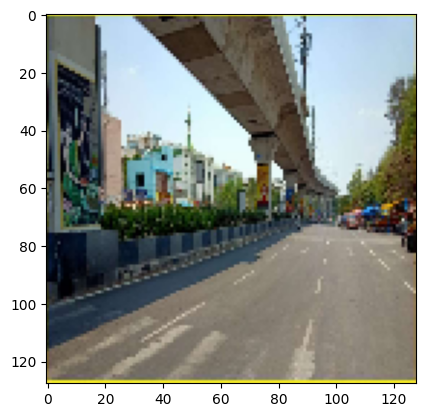

In [70]:
plt.imshow(images[1])

In [71]:
#PROCESS IMAGE UTILITY
def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

In [72]:
#SHOW IMAGE UTILITY
def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [73]:
demoImage = preprocess_image(images[1])
classifier = hub.load(model_handle)

input_shape = demoImage.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
%time warmup_logits = classifier(warmup_input).numpy()

CPU times: user 487 ms, sys: 3.77 ms, total: 491 ms
Wall time: 484 ms


In [74]:
max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]

Images will be converted to 128x128


CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 11.7 ms
(1)  840 - suspension bridge: 0.08165517449378967
(2)  707 - patio: 0.07770338654518127
(3)  836 - sundial: 0.04197487607598305
(4)  443 - bell cote: 0.04000386595726013
(5)  683 - obelisk: 0.03360437974333763


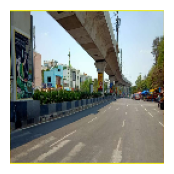

In [75]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(demoImage)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(demoImage, '')

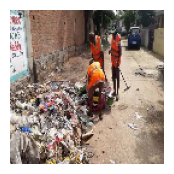

In [76]:
demoImage = preprocess_image(images[120])
show_image(demoImage, '')

CPU times: user 11.3 ms, sys: 21 µs, total: 11.3 ms
Wall time: 9.93 ms
(1)  666 - moped: 0.39420193433761597
(2)  492 - chain saw: 0.10857512056827545
(3)  831 - stretcher: 0.09726106375455856
(4)  671 - motor scooter: 0.051124174147844315
(5)  803 - snowmobile: 0.02552846632897854


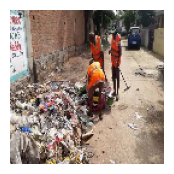

In [77]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(demoImage)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(demoImage, '')

In [78]:
model_name = "mobilenetv2-035-128"

#NOTICE HOW WE ARE USING FEATURE VECTOR FOR THIS STEP AND NOT CLASSIFIER
model_handle_map = {
  "mobilenetv2-035-128": "/kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 128)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 4


Selected model: mobilenetv2-035-128 : /kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2
Input size (128, 128)


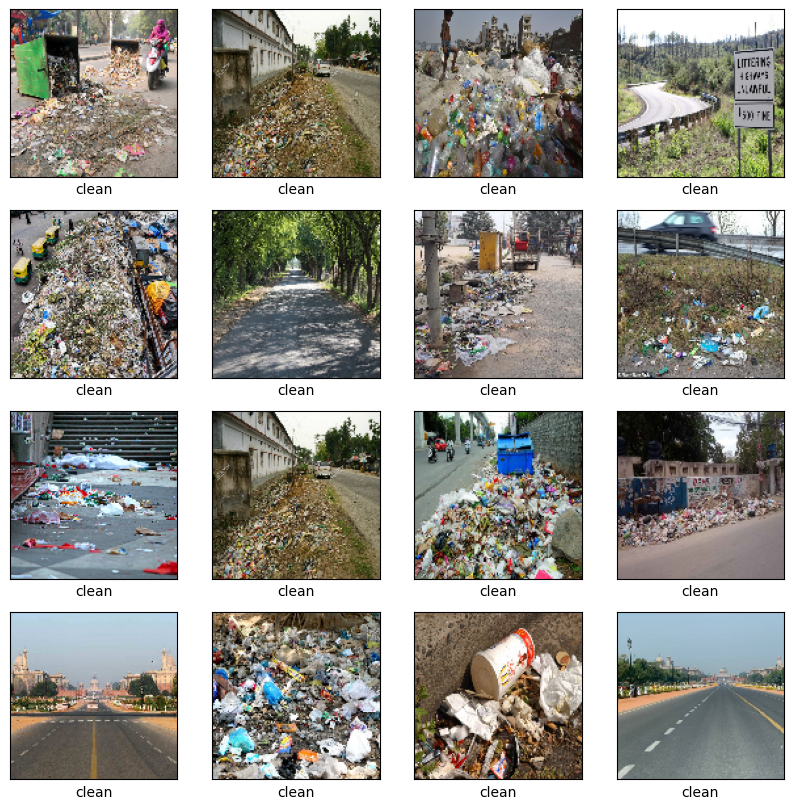

In [79]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

In [80]:
images_path = '/kaggle/input/cleandirty-road-classification/Images/Images/'

labels_df = pd.read_csv('/kaggle/input/cleandirty-road-classification/metadata.csv')
print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[image[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')



labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)


<ipython-input-80-4f51dc0ae29e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(images_path + image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
<ipython-input-80-4f51dc0ae29e>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1



labels shape: (237, 2)
images shape: (237, 128, 128, 3)


In [81]:
# DEFINE TRAIN/TEST SPLIT
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (213, 128, 128, 3)
train labels shape: (213, 2)

validation images shape: (24, 128, 128, 3)
validation labels shape: (24, 2)



In [82]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

In [83]:
import os
print(os.listdir('/kaggle/input'))


['mobilenet-v2', 'cleandirty-road-classification']


In [84]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True,
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

In [85]:
pip show tensorflow tensorflow-hub


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, protobuf, tf-keras
Required-by: 


In [86]:
model_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [88]:
do_fine_tuning = False

print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(len(class_names),
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7986a3bc72b0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [89]:
do_fine_tuning = False
IMAGE_SIZE = (128, 128)

# Updated model_handle to the correct directory

model_handle = "/kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2" # Added the specific model name to the path

print("Building model with", model_handle)


print("Building model with", model_handle)

# Create a functional model instead of a Sequential model
input_layer = tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,))
hub_layer = hub.KerasLayer(model_handle, trainable=do_fine_tuning)(input_layer) # Pass the input layer to the hub layer
dropout_layer = tf.keras.layers.Dropout(rate=0.2)(hub_layer)
output_layer = tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.0001))(dropout_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Building model with /kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2
Building model with /kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2


ValueError: Exception encountered when calling layer 'keras_layer_25' (type KerasLayer).

Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (4 total):
    * <InputLayer name=input_layer_37, built=True>
    * False
    * False
    * 0.99
  Keyword arguments: {}

 Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='inputs')
    * True
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 2:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='inputs')
    * True
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 3:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='inputs')
    * False
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 4:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='inputs')
    * False
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Call arguments received by layer 'keras_layer_25' (type KerasLayer):
  • inputs=<InputLayer name=input_layer_37, built=True>
  • training=None